# START GO example

In [1]:
#!pip install goatools

In [2]:
#first need to make background gene set

#https://www.ncbi.nlm.nih.gov/gene
#"10090"[Taxonomy ID] AND alive[property] AND genetype protein coding[Properties]
#"9606"[Taxonomy ID] AND alive[property] AND genetype protein coding[Properties]
#human is 9606

#send to file

In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
from goatools.cli.ncbi_gene_results_to_python import ncbi_tsv_to_py

ncbi_tsv = 'gene_result.txt'
output_py = 'genes_ncbi_9606_proteincoding.py'
ncbi_tsv_to_py(ncbi_tsv, output_py)

      20,623 lines READ:  gene_result.txt
      20,605 geneids WROTE: genes_ncbi_9606_proteincoding.py


In [4]:
# !mv path/to/Downloads/gene_result.txt .
# !python path/to/miniconda3/envs/sc/bin/ncbi_gene_results_to_python.py -o genes_ncbi_mus_musculus_proteincoding.py gene_result.txt
#move created file to default import location so you dont have to make every time

In [2]:
from genes_ncbi_9606_proteincoding import GENEID2NT as GeneID2nt_mus

In [3]:
from goatools.base import download_go_basic_obo
from goatools.base import download_ncbi_associations
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

In [4]:
#run one time to initialize
obo_fname = download_go_basic_obo()
fin_gene2go = download_ncbi_associations()
obodag = GODag("go-basic.obo")

$ get http://purl.obolibrary.org/obo/go/go-basic.obo
requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo

$ get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
FTP RETR ftp.ncbi.nlm.nih.gov gene/DATA gene2go.gz -> gene2go.gz
$ gunzip gene2go.gz
go-basic.obo: fmt(1.2) rel(2022-11-03) 46,800 Terms


In [5]:
#run one time to initialize
mapper = {}

for key in GeneID2nt_mus:
    mapper[GeneID2nt_mus[key].Symbol] = GeneID2nt_mus[key].GeneID
    
inv_map = {v: k for k, v in mapper.items()}

In [6]:
inv_map

{1: 'A1BG',
 2: 'A2M',
 9: 'NAT1',
 10: 'NAT2',
 12: 'SERPINA3',
 13: 'AADAC',
 14: 'AAMP',
 15: 'AANAT',
 16: 'AARS1',
 18: 'ABAT',
 19: 'ABCA1',
 20: 'ABCA2',
 21: 'ABCA3',
 22: 'ABCB7',
 23: 'ABCF1',
 24: 'ABCA4',
 25: 'ABL1',
 26: 'AOC1',
 27: 'ABL2',
 28: 'ABO',
 29: 'ABR',
 30: 'ACAA1',
 31: 'ACACA',
 32: 'ACACB',
 33: 'ACADL',
 34: 'ACADM',
 35: 'ACADS',
 36: 'ACADSB',
 37: 'ACADVL',
 38: 'ACAT1',
 39: 'ACAT2',
 40: 'ASIC2',
 41: 'ASIC1',
 43: 'ACHE',
 47: 'ACLY',
 48: 'ACO1',
 49: 'ACR',
 50: 'ACO2',
 51: 'ACOX1',
 52: 'ACP1',
 53: 'ACP2',
 54: 'ACP5',
 55: 'ACP3',
 56: 'ACRV1',
 58: 'ACTA1',
 59: 'ACTA2',
 60: 'ACTB',
 70: 'ACTC1',
 71: 'ACTG1',
 72: 'ACTG2',
 81: 'ACTN4',
 86: 'ACTL6A',
 87: 'ACTN1',
 88: 'ACTN2',
 89: 'ACTN3',
 90: 'ACVR1',
 91: 'ACVR1B',
 92: 'ACVR2A',
 93: 'ACVR2B',
 94: 'ACVRL1',
 95: 'ACY1',
 97: 'ACYP1',
 98: 'ACYP2',
 100: 'ADA',
 101: 'ADAM8',
 102: 'ADAM10',
 103: 'ADAR',
 104: 'ADARB1',
 105: 'ADARB2',
 107: 'ADCY1',
 108: 'ADCY2',
 109: 'ADCY3',
 1

In [7]:
#run one time to initialize

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[9606])
# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

HMS:0:00:02.194608 348,659 annotations, 20,742 genes, 18,982 GOs, 1 taxids READ: gene2go 


In [8]:
#run one time to initialize
goeaobj = GOEnrichmentStudyNS(
        GeneID2nt_mus.keys(), # List of mouse protein-coding genes
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 83% 17,046 of 20,605 population items found in association

Load CC Ontology Enrichment Analysis ...
 88% 18,102 of 20,605 population items found in association

Load MF Ontology Enrichment Analysis ...
 85% 17,552 of 20,605 population items found in association


In [9]:
#run one time to initialize
GO_items = []

temp = goeaobj.ns2objgoea['BP'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['CC'].assoc
for item in temp:
    GO_items += temp[item]
    

temp = goeaobj.ns2objgoea['MF'].assoc
for item in temp:
    GO_items += temp[item]


In [10]:
#pass list of gene symbols
def go_it(test_genes):
    print(f'input genes: {len(test_genes)}')
    
    mapped_genes = []
    for gene in test_genes:
        try:
            mapped_genes.append(mapper[gene])
        except:
            pass
    print(f'mapped genes: {len(mapped_genes)}')
    print(mapped_genes)
    
    goea_results_all = goeaobj.run_study(mapped_genes)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    GO = pd.DataFrame(list(map(lambda x: [x.GO, x.goterm.name, x.goterm.namespace, x.p_uncorrected, x.p_fdr_bh,\
                   x.ratio_in_study[0], x.ratio_in_study[1], GO_items.count(x.GO), list(map(lambda y: inv_map[y], x.study_items)),\
                   ], goea_results_sig)), columns = ['GO', 'term', 'class', 'p', 'p_corr', 'n_genes',\
                                                    'n_study', 'n_go', 'study_genes'])

    GO = GO[GO.n_genes > 1]
    return GO


In [15]:
# genesLists = ["UTY", "ZNF736", "AC109439.2", "LINC02506", "AC097654.1", "AL162493.1", "AC005863.1", "AL009179.2", "MMP20", "LINCO2511", "LINCO1060", "NPY", "HCG24", "AC090138.1", "AC012645.1", "IL33", "GATD3A", "BCAN", "AL691447.2", "LINC01717", "C80rf34", "DEC1", "LINC02712", "AC016590.", "TNC", "AL355338.1", "NHLH2", "EBF2", "AL049637.2", "WNT7B", "NPIPA8", "ACO25508.1", "LHX1-DT", "RSP01", "VSX1", "CDC20B", "RSP03", "AC116609.3", "b39 10", "LHX5", "C6orf141", "LHX5-AS1", "ILHX1", "FAM135B", "WNT8B", "GMNC", "AC090348.1", "AL354863.1", "COL22A1", "CCNO", "CHCHD2"]
genesLists = ["CHCHD2", "ZNF736", "AC109439.2", "LINC02506", "AC097654.1", "AL162493.1", "AC005863.1",]

df = go_it(genesLists)

input genes: 7
mapped genes: 2
[51142, 728927]

Runing BP Ontology Analysis: current study set of 2 IDs.
100%      2 of      2 study items found in association
100%      2 of      2 study items found in population(20605)
Calculating 12,501 uncorrected p-values using fisher_scipy_stats
  12,501 terms are associated with 17,046 of 20,605 population items
       7 terms are associated with      2 of      2 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)

Runing CC Ontology Analysis: current study set of 2 IDs.
100%      2 of      2 study items found in association
100%      2 of      2 study items found in population(20605)
Calculating 1,782 uncorrected p-values using fisher_scipy_stats
   1,782 terms are associated with 18,102 of 20,605 population items
       3 terms are ass

In [30]:
df

,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes


In [16]:
df['per'] = df.n_genes/df.n_go

In [17]:
df = df[0:10]

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap

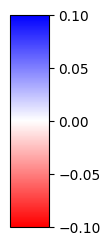

In [19]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))

cmap = mpl.cm.bwr_r
norm = mpl.colors.Normalize(vmin = df.p_corr.min(), vmax = df.p_corr.max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')

In [20]:
plt.figure(figsize = (2,4))



ax = sns.barplot(data = df, x = 'per', y = 'term', palette = mapper.to_rgba(df.p_corr.values))

ax.set_yticklabels([textwrap.fill(e, 22) for e in df['term']])

plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 200x400 with 0 Axes>